**Please type your name and A number here:**

In [21]:
Name = "Riley May"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = ""
assert A_number != "A02242497", 'Please enter your A-number in the above quotation marks, thanks!'

## Imports

In [22]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_curve,
    precision_recall_curve,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import PrecisionRecallDisplay

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

rubric={points:12}

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B.

- Model A confusion matrix

In [23]:
cm_A = pd.DataFrame(
    [[3, 10],
     [1, 106]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_A

Predicted disease  Predicted no disease
Actual disease                     3                    10
Actual no disease                  1                   106

- Model B confusion matrix

In [24]:
cm_B = pd.DataFrame(
    [[8, 5],
     [12, 95]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_B

Predicted disease  Predicted no disease
Actual disease                     8                     5
Actual no disease                 12                    95

### 1.1 Positive vs. negative class 
rubric={points:1}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

Type your answer here: 

Disease.
In case of spotting problems, the thing that we are interested in spotting is considered "positive." Here we are interested in spotting disease. 


### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [25]:
results_dict = {"A": {}, "B": {}}

In [26]:
def accuracy(df):
    total = df.sum().sum() 
    TP = df['Predicted disease'].loc['Actual disease']
    TN = df['Predicted no disease'].loc['Actual no disease']
    return ( TP +TN ) / (total)
        

results_dict["A"]["accuracy"] = accuracy(cm_A)  # Replace your code here
results_dict["B"]["accuracy"] = accuracy(cm_B) # Replace your code here

In [27]:
pd.DataFrame(results_dict)

A         B
accuracy  0.908333  0.858333

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

Type your answer here:  

I would pick model A. It is more accurate.

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without calling `scikit-learn` functions.

In [28]:
def precision(df):
    TP = df['Predicted disease'].loc['Actual disease']
    FP = df['Predicted disease'].loc['Actual no disease']
    return TP / (TP + FP)

def recall(df):
    TP = df['Predicted disease'].loc['Actual disease']
    FN = df['Predicted no disease'].loc['Actual disease']
    return TP / (TP + FN)

def f1(df):
    p = precision(df)
    r = recall(df)
    return 2*  (p * r)/ (p + r)

In [29]:
results_dict["A"]["precision"] = precision(cm_A)  
results_dict["B"]["precision"] = precision(cm_B) 
results_dict["A"]["recall"] = recall(cm_A)  
results_dict["B"]["recall"] = recall(cm_B)
results_dict["A"]["f1"] = f1(cm_A)
results_dict["B"]["f1"] = f1(cm_B)

In [30]:
p = 62/ (62 +40)
p

0.6078431372549019

In [31]:
r = 62 / (62+ 3)
r

0.9538461538461539

In [32]:
f1 = 2* p * r / (p +r)

In [33]:
f1

0.7425149700598802

Show the dataframe with all results. 

In [34]:
pd.DataFrame(results_dict)

A         B
accuracy   0.908333  0.858333
precision  0.750000  0.400000
recall     0.230769  0.615385
f1         0.352941  0.484848

### 1.5 Discussion
rubric={points:2}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

Type your answer here:

1. I believe that F1 score is generally most informative because it combines both the precision and recall

2. I would pick model B because it has the higher F1 score.

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>
rubric={points:48}

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis. For now, we'll just treat it as a binary classification problem. 

In [35]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

state  account length  area code phone number international plan  \
1402    NE              70        415     421-8535                 no   
1855    WI              67        510     417-2265                 no   
633     NJ             122        415     327-9341                 no   
1483    NV             107        510     419-9688                yes   
2638    HI             105        510     364-8128                 no   
...    ...             ...        ...          ...                ...   
2154    WY             126        408     339-9798                yes   
3089    WV              70        510     348-3777                 no   
1766    NJ             125        415     406-6400                 no   
1122    NE             159        415     362-5111                 no   
1346    PA             106        408     403-9167                yes   

     voice mail plan  number vmail messages  total day minutes  \
1402              no                      0              213.4   
1855              no                      0              109.1   
633              yes                     34              146.4   
1483              no                      0              234.1   
2638              no                      0              125.4   
...              ...                    ...                ...   
2154              no                      0              197.6   
3089             yes                     30              143.4   
1766              no                      0              182.3   
1122              no                      0              189.1   
1346              no                      0              133.7   

      total day calls  total day charge  ...  total eve calls  \
1402               86             36.28  ...               77   
1855              134             18.55  ...               76   
633               104             24.89  ...              103   
1483               91             39.80  ...              105   
2638              116             21.32  ...               95   
...               ...               ...  ...              ...   
2154              126             33.59  ...              112   
3089               72             24.38  ...               92   
1766               64             30.99  ...              121   
1122              105             32.15  ...              147   
1346               45             22.73  ...              107   

      total eve charge  total night minutes  total night calls  \
1402             17.40                256.6                101   
1855             12.10                 91.2                 86   
633               7.62                220.0                 91   
1483             13.86                282.5                100   
2638             22.23                241.6                104   
...                ...                  ...                ...   
2154             20.95                285.3                104   
3089             14.45                127.9                 68   
1766             11.88                171.6                 96   
1122             20.92                242.0                106   
1346             15.96                181.9                 89   

      total night charge  total intl minutes  total intl calls  \
1402               11.55                 5.7                 4   
1855                4.10                10.9                 5   
633                 9.90                15.6                 4   
1483               12.71                10.0                 3   
2638               10.87                11.4                 9   
...                  ...                 ...               ...   
2154               12.84                12.5                 8   
3089                5.76                 9.4                 4   
1766                7.72                11.6                 7   
1122               10.89                10.4                 5   
1346                8.19           

### 2.1 Distribution of target values
rubric={points:2}

**Your tasks:**

Examine the distribution of target values in the train split.(Print out the count of each class) Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [36]:
# Insert your code here
print("True, False")
print(train_df['churn'].sum(), len(train_df['churn'])- train_df['churn'].sum())

train_df['churn'].sum()/ len(train_df['churn'])  

True, False
349 1984


0.1495927989712816

Type your answer here:

Here we see that the majority of the answers are False.

It might skew the model into predicting False always. We will have to deal with the skew if it occurs.


### 2.2 Column transformer 
rubric={points:12}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

You can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 


In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [55]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [38]:
X_train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [39]:
# Insert your code here


# ordinal_features = [] 
categorical_features = [] 
numeric_features = ['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'] 
binary_features = ['international plan', 'voice mail plan' ] 
# drop_features = ["state", 'account length', 'phone number',  'total day charge',  'total eve charge',  'total night charge', 'total intl calls', 'total intl charge']  # do not include these features in modeling
passthrough_features = ['total day calls', 'total eve calls', 'total night calls', 'customer service calls'] # do not apply any transformation

target = "income"



# Task 1:
preprocessor =  make_column_transformer(    
    (StandardScaler(), numeric_features),  # scaling on numeric features
    ("passthrough", passthrough_features),  # no transformations on the binary features    
    (OneHotEncoder(), categorical_features+binary_features),  # OHE on categorical features
#     ("drop", drop_features),  # drop the drop features
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['account length', 'total day minutes',
                                  'total eve minutes', 'total night minutes',
                                  'total intl minutes']),
                                ('passthrough', 'passthrough',
                                 ['total day calls', 'total eve calls',
                                  'total night calls',
                                  'customer service calls']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['international plan', 'voice mail plan'])])

Briefly explain your rationale:


I did stand scalar on the account lenght and all the minutes. I figured minutes would show properly usage as well, but there would be a wide range of values.

I passed through number of calls because those should be too different from each other and they are smaller integers.

I included one hot encoders on the plans. Those are binary so they needed some form of encoding. 



### 2.3 Visualizing the transformed data 
rubric={points:1}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture for code that can get you the new column names after transforming. 

In [40]:
# Insert your code here


X_train_trans = preprocessor.fit_transform(X_train)


column_names = (
    numeric_features
    + preprocessor.named_transformers_["onehotencoder"].get_feature_names().tolist()
    + passthrough_features
)


pd.DataFrame(X_train_trans, columns=column_names).head()

account length  total day minutes  total eve minutes  total night minutes  \
0       -0.767893           0.618769           0.069871             1.088667   
1       -0.843585          -1.293778          -1.167277            -2.162302   
2        0.544113          -0.609809          -2.210130             0.369287   
3        0.165650           0.998345          -0.754894             1.597736   
4        0.115188          -0.994886           1.195994             0.793839   

   total intl minutes  x0_no  x0_yes  x1_no  x1_yes  total day calls  \
0           -1.645501   86.0    77.0  101.0     1.0              1.0   
1            0.227019  134.0    76.0   86.0     2.0              1.0   
2            1.919489  104.0   103.0   91.0     2.0              1.0   
3           -0.097071   91.0   105.0  100.0     1.0              0.0   
4            0.407069  116.0    95.0  104.0     2.0              1.0   

   total eve calls  total night calls  customer service calls  
0              0.0                1.0                     0.0  
1              0.0                1.0                     0.0  
2              0.0                0.0                     1.0  
3              1.0                1.0                     0.0  
4              0.0                1.0                     0.0

### 2.4 Area code feature
rubric={points:1}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?

Type your answer here:

They represent geographic locations and not actual scalar values.  We could assign a single value per area code. 

### 2.5 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any *warnings* the code produces (2 sentences max).

In [41]:
def getMetrics(pipe):
    data = {
#     "calculation": [],
    "accuracy": [],
#     "error": [],
    "precision": [],
    "recall": [],
    "f1 score": [],
    }
#     print("Folds")
    accuracy = cross_val_score(pipe, X_train, y_train, cv= 5, scoring="accuracy")
    precision = cross_val_score(pipe, X_train, y_train, cv= 5, scoring="precision")
    accuracy = cross_val_score(pipe, X_train, y_train, cv= 5, scoring="accuracy")
    recall = cross_val_score(pipe, X_train, y_train, cv= 5, scoring="recall")
    f1 = cross_val_score(pipe, X_train, y_train, cv= 5, scoring="f1")
    data["accuracy"] = accuracy
    data["precision"] = precision
    data["recall"] = recall
    data["f1 score"] = f1
    x = pd.DataFrame.from_dict(data)
    x.set_index([['1', '2', '3', '4', '5']], inplace=True)
    return x
    

In [42]:
# Insert your code

dclf = DummyClassifier()

dclf.fit(X_train, y_train)
pipe = make_pipeline(preprocessor, dclf)

results = getMetrics(pipe)

results.T

C:\Users\rjmay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjmay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjmay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjmay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

1         2         3         4         5
accuracy   0.850107  0.850107  0.850107  0.851931  0.849785
precision  0.000000  0.000000  0.000000  0.000000  0.000000
recall     0.000000  0.000000  0.000000  0.000000  0.000000
f1 score   0.000000  0.000000  0.000000  0.000000  0.000000

Results


Recall formula has true positives in the numerator;  we get 0 true positives, so we get 0s for all the folds. 

We get warnings because we are dividing by 0 becasue we are dividing by FP and TP; it doesn't predict any to be positive (it uses the most comomon one).

### 2.6 Logistic regression
rubric={points:4} 

**Your tasks:**

1. Create a `LogisticRegression`. 
2. Report the same metrics as in the previous part.

In [43]:
# Insert your code here:


logistic = LogisticRegression(max_iter=1000)

pipe = make_pipeline(preprocessor, logistic)

results = getMetrics(pipe)


results.T

1         2         3         4         5
accuracy   0.858672  0.845824  0.854390  0.849785  0.860515
precision  0.576923  0.454545  0.538462  0.484848  0.619048
recall     0.214286  0.142857  0.200000  0.231884  0.185714
f1 score   0.312500  0.217391  0.291667  0.313725  0.285714

### 2.7 Logistic regression with `class_weight`
rubric={points:2}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [44]:
# Insert your code here:


logistic2 = LogisticRegression(max_iter=1000, class_weight='balanced' )

pipe = make_pipeline(preprocessor, logistic2)

results = getMetrics(pipe)

results.T

1         2         3         4         5
accuracy   0.783726  0.770878  0.775161  0.746781  0.725322
precision  0.385185  0.375839  0.366412  0.339869  0.323171
recall     0.742857  0.800000  0.685714  0.753623  0.757143
f1 score   0.507317  0.511416  0.477612  0.468468  0.452991

This model has a better F1 score. This means it is better at identifying actual positives from recall or precision perspective. In other words, the recall is better.

### 2.8 Hyperparameter optimization
rubric={points:6}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen ? (Print out best "C" and best "class_weight")

In [45]:
# Insert your code here:

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter = 1000))


param_grid = {
    "logisticregression__C": 10.0 ** np.arange(-1.5, 2, 0.5),
    "logisticregression__class_weight": ['None', 'balanced'],
}

grid_search = GridSearchCV(
    pipe, param_grid, cv=4, n_jobs=-1, scoring='f1'
)

grid_search.fit(X_train, y_train) # all the work is done here
# grid_search

print()

In [46]:
grid_search.best_score_
# grid_search.estimator.get_params().keys()

0.474103915565789

In [51]:
clf  = grid_search.best_estimator_

In [53]:
clf.score(X_test, y_test)

0.796

In [23]:
grid_search.best_params_

print(" Best C value is 10. \n The best class weight is balance." )

 Best C value is 10. 
 The best class weight is balance.


### 2.9 Test results
rubric={points:16}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 

              precision    recall  f1-score   support

       False       0.96      0.77      0.85       866
        True       0.35      0.78      0.48       134

    accuracy                           0.77      1000
   macro avg       0.65      0.78      0.67      1000
weighted avg       0.88      0.77      0.80      1000



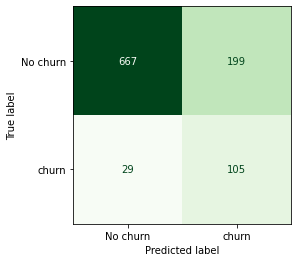

In [24]:
# Insert your code here:
from sklearn.metrics import plot_confusion_matrix


pipe = make_pipeline(preprocessor, LogisticRegression(class_weight = "balanced", max_iter = 1000, C= 10))

pipe.fit(X_train, y_train)

disp = plot_confusion_matrix(
    pipe,
    X_test,
    y_test,
    display_labels=["No churn", "churn"],
    values_format="d",
    cmap=plt.cm.Greens,
    colorbar=False,
);


y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

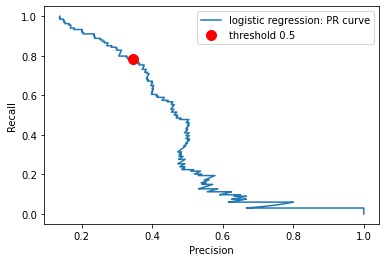

In [25]:
thresholds = np.arange(0.0, 1.0, 0.1)

precision, recall, thresholds = precision_recall_curve(
    y_test, pipe.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, pipe.predict(X_test)),
    recall_score(y_test, pipe.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

AUC for LR: 0.828


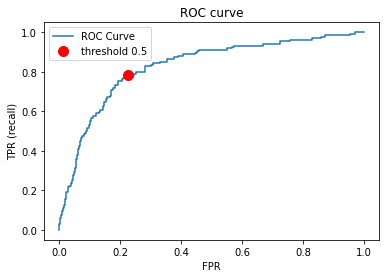

In [26]:
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.title("ROC curve")
plt.legend(loc="best");

roc_lr = roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])
print("AUC for LR: {:.3f}".format(roc_lr))


### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


rubric={points=40}

For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [27]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:10}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [28]:
# Insert your code here:


train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)

y_trainH = train_df["MedHouseVal"]
X_trainH = train_df.drop(columns = ['MedHouseVal'])

y_testH = test_df["MedHouseVal"]
X_testH = test_df.drop(columns = ['MedHouseVal'])


numeric_features = ['HouseAge',  'MedInc', 'Population' ] 
passthrough_features = ['AveOccup', 'AveRooms', 'AveBedrms'] # do not apply any transformation


ct =  make_column_transformer(    
    (StandardScaler(), numeric_features),  # scaling on numeric features
    ("passthrough", passthrough_features),  # no transformations on the binary features    
#     (OneHotEncoder(), categorical_features+binary_features),  # OHE on categorical features
#     ("drop", drop_features),  # drop the drop features
)

ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['HouseAge', 'MedInc', 'Population']),
                                ('passthrough', 'passthrough',
                                 ['AveOccup', 'AveRooms', 'AveBedrms'])])

It seemed necessary to perform some columns tranformations. 

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 

In [29]:
# Insert your code here:
dlf = DummyRegressor()

pipe = make_pipeline(ct, dlf)

pd.DataFrame(cross_validate(pipe, X_trainH, y_trainH, cv=5 ))


fit_time  score_time  test_score
0  0.016068    0.008055   -0.000023
1  0.014521    0.002651   -0.000576
2  0.016775    0.007063   -0.000061
3  0.016185    0.005608   -0.000015
4  0.012521    0.004066   -0.000058

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. Which model seems to be performing well with different metrics? 


In [30]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [31]:
# Insert your code here:

results = []
model_num =0
for x in models:
    new_array = []
    for s in score_types_reg:
        score = score_types_reg[s]
        model = models[x]
    
        pipe = make_pipeline(ct, model)
        values = cross_validate(pipe, X_trainH, y_trainH, scoring =score)
        new_array.append(np.average(values['test_score']))
    results.append(new_array)

                        
df = pd.DataFrame(results, columns =score_types_reg, index = models )

df

neg_mean_squared_error  neg_root_mean_squared_error  \
Ridge                       -0.793325                    -0.873104   
Random Forest               -0.419639                    -0.647561   

               neg_mean_absolute_error        r2  mape_scorer  
Ridge                        -0.577504  0.398412   -35.438345  
Random Forest                -0.463735  0.685186   -28.474421

Type your answer here:

The Ridge has quite a higher error.

It appears that the Random Forest is appears is scoring better across all the metrics. It took a lot longer to run though. It is lower for all the error values which is better. The r^2 is higher which is good, and the mape_scorer is higher. 

### 3.4 Hyperparameter optimization 
rubric={points:8}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 

In [32]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [33]:
# Insert your code here:
pipe = make_pipeline(ct, Ridge())

random_search = RandomizedSearchCV(
    pipe, param_dist, cv=4, n_jobs=-1, scoring="r2"
)

random_search.fit(X_trainH, y_trainH) 

print("Best score", random_search.best_score_)
print("Best params", random_search.best_params_)

Best score 0.41539071201145794
Best params {'ridge__alpha': 0.001961600642198449}


### 3.5 Test results
rubric={points:6}

**Your tasks:**

1. Try the best model on the test set and use mape metric to evaluate your results.
2. Briefly comment on the results. (1 to 2 sentences) 

In [34]:
# Insert your code here:
pipe = make_pipeline(ct, Ridge(0.0011082587036170706))


pipe.fit(X_trainH, y_trainH) 

pred = pipe.predict(X_testH)

mape(y_testH, pred)

34.70198821125023

Type your answer here:

The results are pretty good. Them mape score seems a little confusing, but I believe the value that was achieved is pretty good because the score is not too high.

It is relative error. It would be better if it was lower. 

### 3.6 Model interpretation  
rubric={points:6}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. Use the `Ridge` model with best hyperparameters. Sort the coefficients in descending order. 
2. Increasing which feature values would result in higher housing price? 

In [35]:
# Insert your code here:

values = [ pipe['ridge'].coef_][0]
# pipe['ridge'].feature_names_in_

array2 = pipe['columntransformer'].transformers
names = array2[0][2] + array2[1][2]

new_df = pd.DataFrame(values, columns=['Coefficients'], index =names )

new_df.sort_values("Coefficients", ascending = False)


Coefficients
MedInc          1.027937
AveBedrms       1.008547
HouseAge        0.204272
Population      0.022814
AveOccup       -0.004632
AveRooms       -0.217822

Type your answer here:

Increasing the factor MedInc has the greatest effect on housing price. It has the highest positive value.

## Submission instructions
<hr>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and delete any throwaway code.